In [1]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components
from collections import defaultdict
import networkx as nx
from math import comb
import matplotlib.pyplot as plt
from tqdm.contrib.concurrent import process_map

In [2]:
Graph = np.array([[0, 1, 1, 0, 0], [1, 0, 1, 0, 0], [1, 1, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1, 0]])
Graph

array([[0, 1, 1, 0, 0],
       [1, 0, 1, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]])

In [2]:
adj_matrices = []
for i in range(2, 10):
    g6_name = f'graph{i}.g6'
    adj_name = f'graph{i}.adj'
    link = f'https://users.cecs.anu.edu.au/~bdm/data/{g6_name}'
    !wget -cq $link
    !./showg -Aq $g6_name $adj_name
    adj_matrices.append(np.loadtxt(adj_name, dtype = int).reshape(-1, i, i))

In [3]:
def PPmax(Graph):
    n = max(Graph[i].sum() for i in range(len(Graph)))
    V = len(Graph)
    PPP = np.poly1d([])
    PPQ = np.poly1d([])

    Graphi = np.zeros(V*V).reshape(V,V)
    left = V
    cycles = 0
    i = 0
    while np.array_equal(Graphi, Graph) == 0:       
        for a in range(V):
            for b in range(V):
                macs = max(Graph[a].sum(), Graph[b].sum())
                mi = min(Graph[a].sum(), Graph[b].sum())
                if int(macs) == i:
                    Graphi[a][b] = Graph[a][b]
        comps = connected_components(Graphi)[0]
        PPP[i] = left - comps
        left = left - (left - comps)
        PPQ[i] = Graphi.sum()/2 - V + comps - cycles
        cicles = Graphi.sum()/2 - V + comps
        i += 1 
    PPP[n+1] = left
    PPP = tuple(PPP)
    PPQ = list(PPQ)
    for i in range(len(PPQ)):
        if PPQ[0] == 0:
            PPQ = PPQ[1:]
    PPQ = tuple(PPQ)
    polys = (PPP, PPQ)
    return polys, Graph

In [80]:
for j in range(8):
  Polynomials = defaultdict(list)
  for i in adj_matrices[j]:
    polys, Graph = PPmax(i)
    Polynomials[polys].append(Graph)
  print('Часть различаемых графов на ' + str(j+2) + ' вершинах равна ' + str(len(Polynomials)/len(adj_matrices[j])) + ' (' + str(len(Polynomials)) + ' из ' + str(len(adj_matrices[j])) + ')' )

Часть различаемых графов на 2 вершинах равна 1.0 (2 из 2)
Часть различаемых графов на 3 вершинах равна 1.0 (4 из 4)
Часть различаемых графов на 4 вершинах равна 1.0 (11 из 11)
Часть различаемых графов на 5 вершинах равна 0.9411764705882353 (32 из 34)
Часть различаемых графов на 6 вершинах равна 0.717948717948718 (112 из 156)
Часть различаемых графов на 7 вершинах равна 0.42528735632183906 (444 из 1044)
Часть различаемых графов на 8 вершинах равна 0.16126680706301635 (1991 из 12346)
Часть различаемых графов на 9 вершинах равна 0.03646220163979787 (10015 из 274668)


In [81]:
def PPsum(Graph):
 n = max(Graph[i].sum() for i in range(len(Graph)))
 V = len(Graph)
 PPP = np.poly1d([])
 PPQ = np.poly1d([])

 Graphi = np.zeros(V*V).reshape(V,V)
 left = V
 cycles = 0
 i = 0
 while np.array_equal(Graphi, Graph) == 0:       
     for a in range(V):
         for b in range(V):
             if Graph[a].sum() + Graph[b].sum() <= i:
                 Graphi[a][b] = Graph[a][b]
     comps = connected_components(Graphi)[0]
     PPP[i] = left - comps
     left = left - (left - comps)
     PPQ[i] = Graphi.sum()/2 - V + comps - cycles
     cicles = Graphi.sum()/2 - V + comps
     i += 1 
 PPP[i] = left
 PPP = tuple(PPP)
 PPQ = list(PPQ)
 for i in range(len(PPQ)):
     if PPQ[0] == 0:
         PPQ = PPQ[1:]
 PPQ = tuple(PPQ)
 polys = (PPP, PPQ)
 return polys, Graph

In [82]:

for j in range(8):
  Polynomials = defaultdict(list)
  for i in adj_matrices[j]:
    polys, Graph = PPsum(i)
    Polynomials[polys].append(Graph)
  print('Часть различаемых графов на ' + str(j+2) + ' вершинах равна ' + str(len(Polynomials)/len(adj_matrices[j])) + ' (' + str(len(Polynomials)) + ' из ' + str(len(adj_matrices[j])) + ')' )

Часть различаемых графов на 2 вершинах равна 1.0 (2 из 2)
Часть различаемых графов на 3 вершинах равна 1.0 (4 из 4)
Часть различаемых графов на 4 вершинах равна 1.0 (11 из 11)
Часть различаемых графов на 5 вершинах равна 1.0 (34 из 34)
Часть различаемых графов на 6 вершинах равна 0.9487179487179487 (148 из 156)
Часть различаемых графов на 7 вершинах равна 0.7873563218390804 (822 из 1044)
Часть различаемых графов на 8 вершинах равна 0.5123926777903774 (6326 из 12346)
Часть различаемых графов на 9 вершинах равна 0.24462623967844815 (67191 из 274668)


In [4]:
def PPbij(Graph):
 n = max(Graph[i].sum() for i in range(len(Graph)))
 V = len(Graph)
 PPP = np.poly1d([])
 PPQ = np.poly1d([])

 Graphi = np.zeros(V*V).reshape(V,V)
 left = V
 cycles = 0
 i = 0
 while np.array_equal(Graphi, Graph) == 0:
     for a in range(V):
         for b in range(V):
             macs = max(Graph[a].sum(), Graph[b].sum())
             mi = min(Graph[a].sum(), Graph[b].sum())
             if int(macs*(macs-1)/2) + mi == i:
                 Graphi[a][b] = Graph[a][b]
     comps = connected_components(Graphi)[0]
     PPP[i] = left - comps
     left = left - (left - comps)
     PPQ[i] = Graphi.sum()/2 - V + comps - cycles
     cycles = Graphi.sum()/2 - V + comps
     i += 1
 PPP[i] = left
 PPP = tuple(PPP)
 PPQ = list(PPQ)
 for i in range(len(PPQ)):
     if PPQ[0] == 0:
         PPQ = PPQ[1:]
 PPQ = tuple(PPQ)
 polys = (PPP, PPQ)
 return polys, Graph

In [85]:

for j in range(8):
  Polynomials = defaultdict(list)
  for i in adj_matrices[j]:
    polys, Graph = PPbij(i)
    Polynomials[polys].append(Graph)
  print('Часть различаемых графов на ' + str(j+2) + ' вершинах равна ' + str(len(Polynomials)/len(adj_matrices[j])) + ' (' + str(len(Polynomials)) + ' из ' + str(len(adj_matrices[j])) + ')' )

Часть различаемых графов на 2 вершинах равна 1.0 (2 из 2)
Часть различаемых графов на 3 вершинах равна 1.0 (4 из 4)
Часть различаемых графов на 4 вершинах равна 1.0 (11 из 11)
Часть различаемых графов на 5 вершинах равна 1.0 (34 из 34)
Часть различаемых графов на 6 вершинах равна 0.9487179487179487 (148 из 156)
Часть различаемых графов на 7 вершинах равна 0.8084291187739464 (844 из 1044)
Часть различаемых графов на 8 вершинах равна 0.5548355742750688 (6850 из 12346)
Часть различаемых графов на 9 вершинах равна 0.2888687433556148 (79343 из 274668)


In [132]:
def PPbijtwist(Graph):
    n = max(Graph[i].sum() for i in range(len(Graph)))
    V = len(Graph)
    PPP = np.poly1d([])
    PPQ = np.poly1d([])
    Graphi = np.zeros(V*V).reshape(V,V)
    left = V
    cycles = 0
    i = 0
    while np.array_equal(Graphi, Graph) == 0:       
        for a in range(V):
            for b in range(V):
                macs = max(Graph[a].sum(), Graph[b].sum())
                mi = min(Graph[a].sum(), Graph[b].sum())
                if int(macs*(macs-1)/2) + mi == 14 and i == 1:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 20 and i == 2:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 19 and i == 3:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 9 and i == 4:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 13 and i == 5:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 15 and i == 6:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 10 and i == 7:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 18 and i == 8:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 26 and i == 9:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 25 and i == 10:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 21 and i == 11:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 8 and i == 12:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 12 and i == 13:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 6 and i == 14:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 27 and i == 15:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 24 and i == 16:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 5 and i == 17:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 17 and i == 18:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 23 and i == 19:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 33 and i == 20:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 32 and i == 21:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 28 and i == 22:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 7 and i == 23:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 11 and i == 24:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 3 and i == 25:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 34 and i == 26:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 31 and i == 27:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 4 and i == 28:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 16 and i == 29:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 35 and i == 30:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 30 and i == 31:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 2 and i == 32:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 22 and i == 33:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 36 and i == 34:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 1 and i == 35:
                    Graphi[a][b] = Graph[a][b]
                elif int(macs*(macs-1)/2) + mi == 29 and i == 36:
                    Graphi[a][b] = Graph[a][b]
                
             # else:
             #    if i == 5 and int(macs*(macs-1)/2) + mi == 9:
             #        Graphi[a][b] = Graph[a][b]
             #    if i == 9 and int(macs*(macs-1)/2) + mi == 5:
             #        Graphi[a][b] = Graph[a][b] 
        comps = connected_components(Graphi)[0]
        PPP[i] = left - comps
        left = left - (left - comps)
        PPQ[i] = Graphi.sum()/2 - V + comps - cycles
        cicles = Graphi.sum()/2 - V + comps
        i += 1 
    PPP[i] = left
    PPP = tuple(PPP)
    PPQ = list(PPQ)
    for i in range(len(PPQ)):
        if PPQ[0] == 0:
            PPQ = PPQ[1:]
    PPQ = tuple(PPQ)
    polys = (PPP, PPQ)
    return polys, Graph

In [133]:

for j in range(8):
  Polynomials = defaultdict(list)
  for i in adj_matrices[j]:
    polys, Graph = PPbijtwist(i)
    Polynomials[polys].append(Graph)
  print('Часть различаемых графов на ' + str(j+2) + ' вершинах равна ' + str(len(Polynomials)/len(adj_matrices[j])) + ' (' + str(len(Polynomials)) + ' из ' + str(len(adj_matrices[j])) + ')' )

Часть различаемых графов на 2 вершинах равна 1.0 (2 из 2)
Часть различаемых графов на 3 вершинах равна 1.0 (4 из 4)
Часть различаемых графов на 4 вершинах равна 1.0 (11 из 11)
Часть различаемых графов на 5 вершинах равна 1.0 (34 из 34)
Часть различаемых графов на 6 вершинах равна 0.9423076923076923 (147 из 156)
Часть различаемых графов на 7 вершинах равна 0.8113026819923371 (847 из 1044)
Часть различаемых графов на 8 вершинах равна 0.5638263405151466 (6961 из 12346)
Часть различаемых графов на 9 вершинах равна 0.29408959179809807 (80777 из 274668)


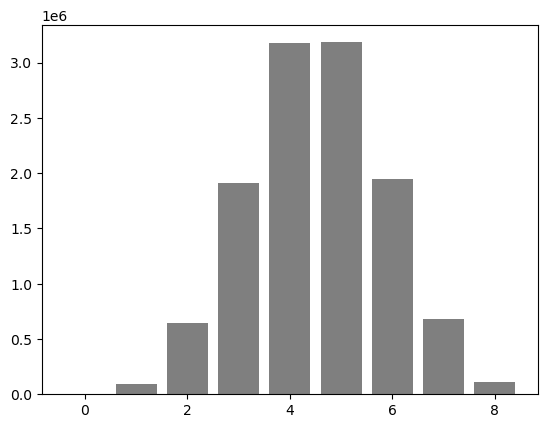

In [94]:
degs = ('0', '1', '2', '3', '4', '5', '6', '7', '8')
col = [0]*9
for i in range(8):
    y_pos = np.arange(len(degs))
    for j in (adj_matrices[i]):
        for k in range(len(j)):
            col[j[k].sum()] += 1
    for t in range(len(col)):
        col[t] = col[t] * t 
    plt.bar(y_pos, col, align='center', alpha=1)
    
    
    

In [111]:
x = {}
for i in range(len(col)):
    for j in range(len(col)):
        x[(i,j)] = col[i]*col[j] 
print(x)

{(0, 0): 0, (0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0, (0, 5): 0, (0, 6): 0, (0, 7): 0, (0, 8): 0, (1, 0): 0, (1, 1): 9082090000, (1, 2): 61471549600, (1, 3): 181907019900, (1, 4): 302922104800, (1, 5): 303332276000, (1, 6): 185608567200, (1, 7): 64598628500, (1, 8): 10367877600, (2, 0): 0, (2, 1): 61471549600, (2, 2): 416066281024, (2, 3): 1231226116056, (2, 4): 2050309035712, (2, 5): 2053085253440, (2, 6): 1256279803968, (2, 7): 437231716040, (2, 8): 70174321344, (3, 0): 0, (3, 1): 181907019900, (3, 2): 1231226116056, (3, 3): 3643452541089, (3, 4): 6067288184328, (3, 5): 6075503586360, (3, 6): 3717591581592, (3, 7): 1293859012635, (3, 8): 207660320136, (4, 0): 0, (4, 1): 302922104800, (4, 2): 2050309035712, (4, 3): 6067288184328, (4, 4): 10103599675456, (4, 5): 10117280438720, (4, 6): 6190748808384, (4, 7): 2154608962520, (4, 8): 345807991872, (5, 0): 0, (5, 1): 303332276000, (5, 2): 2053085253440, (5, 3): 6075503586360, (5, 4): 10117280438720, (5, 5): 10130979726400, (5, 6): 619913

In [112]:
{k: v for k, v in sorted(x.items(), key=lambda item: item[1])}

{(0, 0): 0,
 (0, 1): 0,
 (0, 2): 0,
 (0, 3): 0,
 (0, 4): 0,
 (0, 5): 0,
 (0, 6): 0,
 (0, 7): 0,
 (0, 8): 0,
 (1, 0): 0,
 (2, 0): 0,
 (3, 0): 0,
 (4, 0): 0,
 (5, 0): 0,
 (6, 0): 0,
 (7, 0): 0,
 (8, 0): 0,
 (1, 1): 9082090000,
 (1, 8): 10367877600,
 (8, 1): 10367877600,
 (8, 8): 11835699264,
 (1, 2): 61471549600,
 (2, 1): 61471549600,
 (1, 7): 64598628500,
 (7, 1): 64598628500,
 (2, 8): 70174321344,
 (8, 2): 70174321344,
 (7, 8): 73744113240,
 (8, 7): 73744113240,
 (1, 3): 181907019900,
 (3, 1): 181907019900,
 (1, 6): 185608567200,
 (6, 1): 185608567200,
 (3, 8): 207660320136,
 (8, 3): 207660320136,
 (6, 8): 211885910208,
 (8, 6): 211885910208,
 (1, 4): 302922104800,
 (4, 1): 302922104800,
 (1, 5): 303332276000,
 (5, 1): 303332276000,
 (4, 8): 345807991872,
 (8, 4): 345807991872,
 (5, 8): 346276232640,
 (8, 5): 346276232640,
 (2, 2): 416066281024,
 (2, 7): 437231716040,
 (7, 2): 437231716040,
 (7, 7): 459473844025,
 (2, 3): 1231226116056,
 (3, 2): 1231226116056,
 (2, 6): 1256279803968,
 

In [19]:
#Гомотопическая эквивалентность тест

In [131]:
x = {}
for i in range(8):
    for j in (adj_matrices[i]):
        for a in range(len(j)):
            for b in range(len(j)):
                if j[a][b] == 1:
                    t = j[a].sum()
                    l = j[b].sum()
                    t, l = max(t, l), min(t, l)
                    if (t, l) in x.keys():
                        x[(t, l)] += 1
                    else:
                        x[(t, l)] = 1
{k: v for k, v in sorted(x.items(), key=lambda item: item[1])}

{(8, 1): 2506,
 (1, 1): 2632,
 (8, 8): 3098,
 (7, 1): 12004,
 (2, 1): 12482,
 (8, 2): 12936,
 (8, 7): 14472,
 (6, 1): 30742,
 (3, 1): 31522,
 (8, 3): 34320,
 (8, 6): 36660,
 (2, 2): 45302,
 (5, 1): 47830,
 (4, 1): 48250,
 (7, 7): 48680,
 (8, 4): 54712,
 (8, 5): 55782,
 (7, 2): 71840,
 (6, 2): 193284,
 (3, 2): 194970,
 (7, 3): 198030,
 (7, 6): 209400,
 (3, 3): 296424,
 (5, 2): 306764,
 (4, 2): 308544,
 (6, 6): 311458,
 (7, 4): 321060,
 (7, 5): 326272,
 (6, 3): 545342,
 (4, 4): 753008,
 (5, 5): 761826,
 (5, 3): 872202,
 (4, 3): 872736,
 (6, 4): 891192,
 (6, 5): 902392,
 (5, 4): 1427746}

In [99]:
def PPmaxQ(Graph):
    n = max(Graph[i].sum() for i in range(len(Graph)))
    V = len(Graph)
    PPP = np.poly1d([])
    PPQ = np.poly1d([])

    Graphi = np.zeros(V*V).reshape(V,V)
    left = V
    cycles = 0
    i = 0
    while np.array_equal(Graphi, Graph) == 0:       
        for a in range(V):
            for b in range(V):
                macs = max(Graph[a].sum(), Graph[b].sum())
                mi = min(Graph[a].sum(), Graph[b].sum())
                if int(macs) == i:
                    Graphi[a][b] = Graph[a][b]
        comps = connected_components(Graphi)[0]
        PPP[i] = left - comps
        left = left - (left - comps)
        PPQ[i] = Graphi.sum()/2 - V + comps - cycles
        cicles = Graphi.sum()/2 - V + comps
        i += 1 
    PPP[n+1] = left
    PPP = tuple(PPP)
    PPQ = list(PPQ)
    for i in range(len(PPQ)):
        if PPQ[0] == 0:
            PPQ = PPQ[1:]
    PPQ = tuple(PPQ)
    polys = (PPQ)
    return polys, Graph

In [95]:
adj_matrices[0][1]

array([[0, 1],
       [1, 0]])

In [96]:
adj_matrices_of_homeq = []
for i in range(len(adj_matrices)):
    for j in range(len(adj_matrices[i])):
        flag = 0
        for k in range(len(adj_matrices[i][j])):
            if adj_matrices[i][j][k].sum() == 2:
                flag = 1
        if flag == 0:
            adj_matrices_of_homeq.append(adj_matrices[i][j])
        

In [97]:
adj_matrices_of_homeq

[array([[0, 0],
        [0, 0]]),
 array([[0, 1],
        [1, 0]]),
 array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]),
 array([[0, 0, 1],
        [0, 0, 0],
        [1, 0, 0]]),
 array([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]),
 array([[0, 0, 0, 1],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [1, 0, 0, 0]]),
 array([[0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [1, 1, 1, 0]]),
 array([[0, 0, 1, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0],
        [0, 1, 0, 0]]),
 array([[0, 1, 1, 1],
        [1, 0, 1, 1],
        [1, 1, 0, 1],
        [1, 1, 1, 0]]),
 array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]),
 array([[0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0]]),
 array([[0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0],
        [1

In [103]:
Polynomials = defaultdict(list)
for i in adj_matrices_of_homeq:
    polys, Graph = PPmaxQ(i)
    Polynomials[polys].append(Graph)
print('Часть различаемых графов равна ' + str(len(Polynomials)/len(adj_matrices_of_homeq)) + ' (' + str(len(Polynomials)) + ' из ' + str(len(adj_matrices_of_homeq)) + ')' )

Часть различаемых графов равна 0.010657224586618294 (1222 из 114664)


In [48]:
G = nx.gnp_random_graph(10, 0.5)

In [49]:
A = nx.to_numpy_array(G)

In [72]:
print(np.poly1d(np.array(PPbij(A)[0][0])))

   29     26     23     19     17     15     14
1 x  + 1 x  + 1 x  + 2 x  + 1 x  + 2 x  + 2 x 


In [442]:
tochn = 1000
n = 10
P = np.poly1d([])
Q = np.poly1d([])
e = 0
for i in range(tochn):
    G = nx.gnp_random_graph(n,0.5)
    A = nx.to_numpy_array(G)
    polys = PPbij(A)
    P+= np.poly1d(np.array(polys[0][0][1:]))
    Q+= np.poly1d(np.array(polys[0][1]))

In [443]:
print(np.array((P+Q)/tochn).sum())
print((P+Q)/tochn)

22.470000000000002
       44         43         42         41         40         39
0.007 x  + 0.018 x  + 0.054 x  + 0.047 x  + 0.039 x  + 0.031 x 
          38         37         36         35         34        33
 + 0.008 x  + 0.003 x  + 0.034 x  + 0.179 x  + 0.352 x  + 0.42 x 
          32         31         30         29         28         27
 + 0.373 x  + 0.171 x  + 0.043 x  + 0.011 x  + 0.236 x  + 1.049 x 
          26         25         24         23         22         21
 + 1.299 x  + 1.028 x  + 0.544 x  + 0.168 x  + 0.024 x  + 1.063 x 
          20         19        18         17         16         15
 + 2.652 x  + 2.096 x  + 1.07 x  + 0.318 x  + 0.039 x  + 1.696 x 
          14         13         12         11         10         9
 + 2.674 x  + 1.373 x  + 0.405 x  + 0.043 x  + 1.039 x  + 1.051 x
          8         7         6         5         4         3         2
 + 0.319 x + 0.038 x + 0.246 x + 0.156 x + 0.014 x + 0.029 x + 0.009 x + 0.002 x


In [444]:
((P+Q)/tochn)/np.array((P+Q)/tochn).sum()*(n*(n-1)/2*2**((n*(n-1)/2 - 1)))

poly1d([2.46619431e+11, 6.34164250e+11, 1.90249275e+12, 1.65587332e+12,
       1.37402254e+12, 1.09217176e+12, 2.81850778e+11, 1.05694042e+11,
       1.19786581e+12, 6.30641115e+12, 1.24014342e+13, 1.47971658e+13,
       1.31412925e+13, 6.02456037e+12, 1.51494793e+12, 3.87544819e+11,
       8.31459794e+12, 3.69576832e+13, 4.57655200e+13, 3.62178249e+13,
       1.91658529e+13, 5.91886633e+12, 8.45552333e+11, 3.74509221e+13,
       9.34335328e+13, 7.38449038e+13, 3.76975415e+13, 1.12035684e+13,
       1.37402254e+12, 5.97523649e+13, 9.42086225e+13, 4.83726397e+13,
       1.42686956e+13, 1.51494793e+12, 3.66053698e+13, 3.70281459e+13,
       1.12387998e+13, 1.33879119e+12, 8.66691142e+12, 5.49609017e+12,
       4.93238861e+11, 1.02170907e+12, 3.17082125e+11, 7.04626944e+10,
       0.00000000e+00])

In [799]:
plt.bar(np.arange(len(np.array(P+Q))), np.array(((P+Q)/tochn)/np.array((P+Q)/tochn).sum()*10*2**9)[::-1], align='center', alpha=1)

NameError: name 'P' is not defined

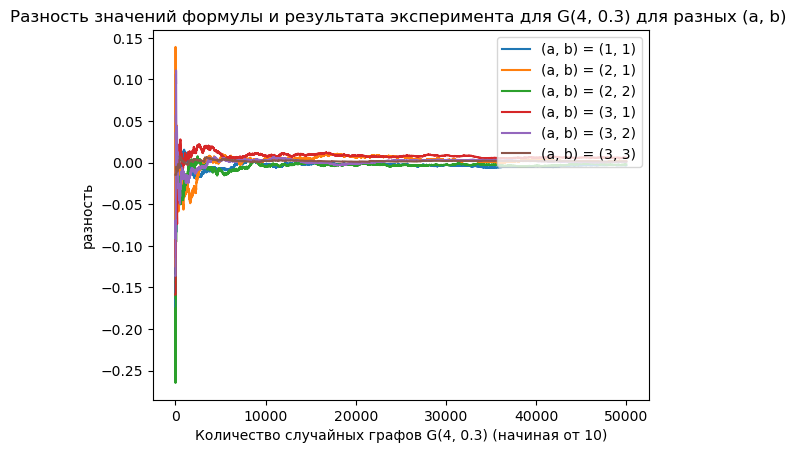

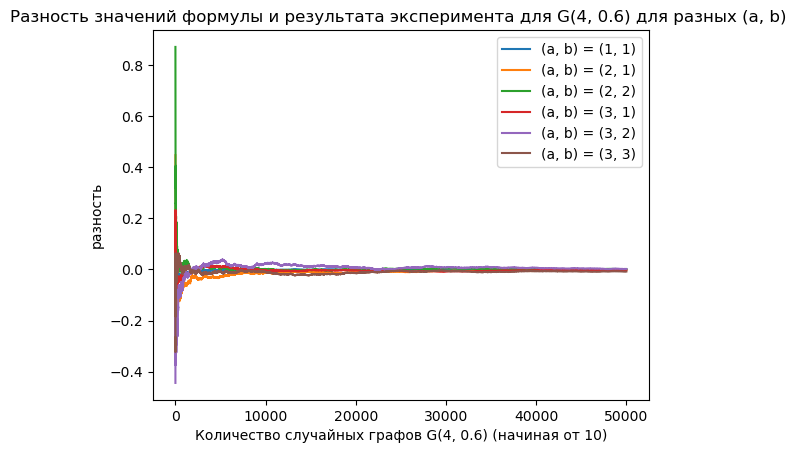

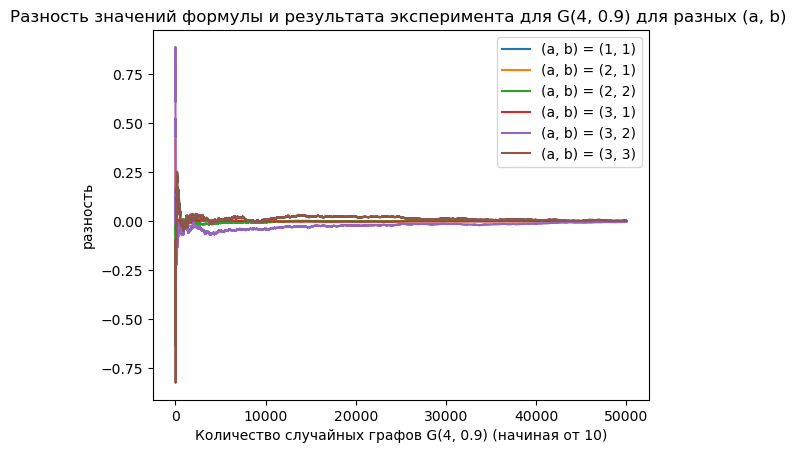

CPU times: user 1min 3s, sys: 250 ms, total: 1min 3s
Wall time: 1min 3s


In [834]:
%%time
n = 4
for p in [0.3,0.6,0.9]:
    
    plt.title("Разность значений формулы и результата эксперимента для G(4, " + str(p) + ") для разных (a, b) ") 
    plt.xlabel("Количество случайных графов G(4, " + str(p) + ") (начиная от 10)") 
    plt.ylabel("разность") 



    diagr = []
    for a in range(1, n):
        for b in range(1, a+1):
            if a == b:
                kmean = 0
                diagr.append(0)       
            else:
                kmean = 0
                for i in range(n):
                    kmean += comb(n-1, i)*p**(i)*(1-p)**(n-i-1)*i
                diagr.append(a*b*comb(n-1, a)*comb(n-1, b)*p**(a+b)*(1-p)**(2*n-a-b-2)*n/(kmean))
            summ += diagr[-1]
    for a in range(1, n):
        numb = 0
        for b in range(1, n):
            numb += diagr[int(max(a,b)*(max(a,b)-1)/2 + min(a,b))-1]
        diagr[int(a*(a-1)/2+a)-1] = ((a*comb(n-1,a)*p**a*(1-p)**(n-a-1)*n) - numb)/2
    for a in range(1, n):
        for b in range(1,a+1):
            expected = diagr[int(a*(a-1)/2+b-1)]
            numofedges=0
            dif = []
            for k in range(50000):
                G = nx.gnp_random_graph(n,p)
                A = nx.to_numpy_array(G)
                col = 0
                for i in range(n):
                    for j in range(i):
                        if A[i][j] == 1:
                            if {sum(A[:][j]), sum(A[i][:])} == {a, b}:
                                col+=1

                numofedges+=col

                dif.append(numofedges/(k+1)-expected)
            plt.plot(np.arange(10, len(dif)+1),dif[9:], label = '(a, b) = (' + str(a)+ ', ' + str(b) + ')') 
    plt.legend(loc = 'upper right')
    plt.show()

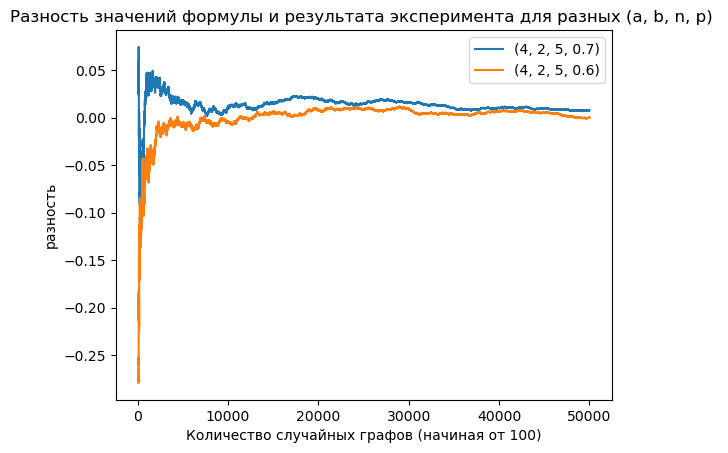

In [775]:
plt.title("Разность значений формулы и результата эксперимента для разных (a, b) ") 
plt.xlabel("Количество случайных графов G(5,0.7) (начиная от 100)") 
plt.ylabel("разность") 
plt.plot(np.arange(100, len(dif)),dif[100:], label = '(4, 2)') 
plt.plot(np.arange(100, len(dif2)),dif2[100:], label = '(4, 2)') 
plt.legend()
plt.show()

In [770]:
dif2[-1]

-0.005655999999999994

In [382]:
numofedges[:10]

[4, 3, 10, 4, 1, 0, 4, 0, 2, 2]

In [89]:
n = 8
p = 0.2
summ = 0
diagr = []
for a in range(1, n):
    for b in range(1, a+1):
        if a == b:
            kmean = 0
            diagr.append(0)       
        else:
            kmean = 0
            for i in range(n):
                kmean += comb(n-1, i)*p**(i)*(1-p)**(n-i-1)*i
            diagr.append(a*b*comb(n-1, a)*comb(n-1, b)*p**(a+b)*(1-p)**(2*n-a-b-2)*n/(kmean))
        summ += diagr[-1]
for a in range(1, n):
    numb = 0
    for b in range(1, n):
        numb += diagr[int(max(a,b)*(max(a,b)-1)/2 + min(a,b))-1]
    diagr[int(a*(a-1)/2+a)-1] = ((a*comb(n-1,a)*p**a*(1-p)**(n-a-1)*n) - numb)/2
    summ += ((a*comb(n-1,a)*p**a*(1-p)**(n-a-1)*n) - numb)/2
print('всего ребер', summ, "а должно быть", comb(n, 2)*p )

всего ребер 5.600000000000002 а должно быть 5.6000000000000005


<BarContainer object of 28 artists>

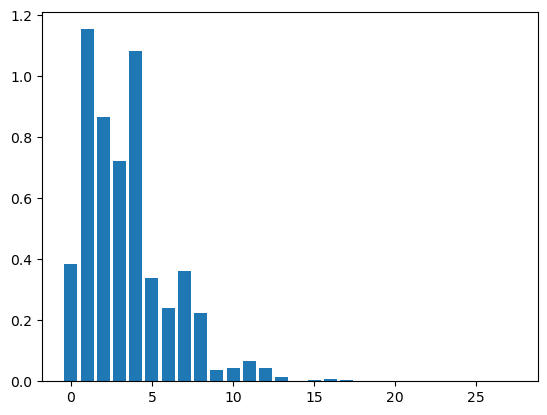

In [6]:
plt.bar(np.arange(len(diagr)), diagr, align='center', alpha=1)

In [7]:
tochn = 100000
e = 0
edgedistr = np.zeros(int(n*(n-1)/2))
for i in range(tochn):
    G = nx.gnp_random_graph(n,p)
    A = nx.to_numpy_array(G)
    for i in range(n):
        for j in range(i+1):
            if A[i][j] == 1:
                edgedistr[int(max(A[i].sum(), A[j].sum()) * (max(A[i].sum(), A[j].sum())-1)/2 + min(A[i].sum(), A[j].sum())) - 1 ] += 1
edgedistr = edgedistr/tochn
print(edgedistr.sum())

5.609190000000001


<BarContainer object of 28 artists>

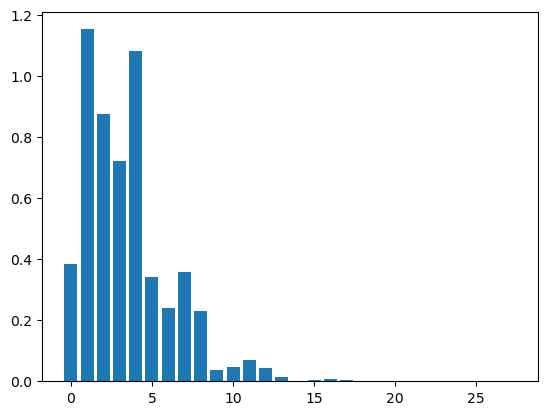

In [8]:
plt.bar(np.arange(len(edgedistr)), edgedistr, align='center', alpha=1)

<BarContainer object of 28 artists>

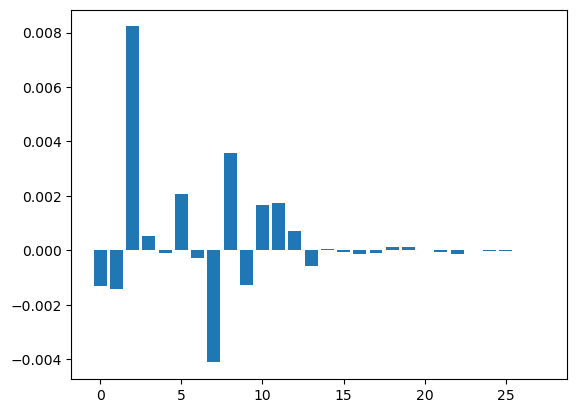

In [9]:
plt.bar(np.arange(len(edgedistr)), edgedistr - diagr, align='center', alpha=1)

In [93]:
np.linalg.norm(edgedistr - diagr, 2)

0.007586042025379672

In [3]:
!wget https://users.cecs.anu.edu.au/~bdm/data/tree4.all.tar.gz

--2023-01-19 23:14:14--  https://users.cecs.anu.edu.au/~bdm/data/tree4.all.tar.gz
Resolving users.cecs.anu.edu.au (users.cecs.anu.edu.au)... 150.203.161.104
Connecting to users.cecs.anu.edu.au (users.cecs.anu.edu.au)|150.203.161.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 161 [application/x-gzip]
Saving to: ‘tree4.all.tar.gz’

tree4.all.tar.gz    100%[===================>]     161  --.-KB/s    in 0s      

2023-01-19 23:14:16 (8.77 MB/s) - ‘tree4.all.tar.gz’ saved [161/161]



In [101]:
def PPcentrfortrees(Graph):
    n = max(Graph[i].sum() for i in range(len(Graph)))
    V = len(Graph)
    PPP = np.poly1d([])

    Graphi = np.zeros(V*V).reshape(V,V)
    left = V
    cycles = 0
    firstcopy = Graph.copy()
    Graphi = np.zeros(V*V).reshape(V,V)
    for a in range(V):
        for b in range(a):
            if firstcopy[a,b] == 1:
                firstcopy[a,b] = 0
                firstcopy[b,a] = 0
                G = nx.from_numpy_array(firstcopy) 
                S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
                firstcopy[a,b] = len(S[0]) * len(S[1])
                firstcopy[b,a] = len(S[0]) * len(S[1])
    for a in range(V):
        for b in range(a):
            if Graph[a,b] == 1:
                PPP[int(firstcopy[a,b])] += 1 
    PPP[int(V/2*V/2) + 1] = 1

    return PPP, Graph

In [66]:
V = 20
int(V/2*V/2)

100

In [102]:
tree = nx.random_tree(n=10)
Tree = nx.to_numpy_array(tree)
tre = Tree.copy()
PPcentrfortrees(tre)[0]

poly1d([1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.,
       5., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [87]:
tre[1,2] = 0
tre[2,1] = 0
tre[0,9] = 2
tre[9,0] = 2
print(tre)
G = nx.from_numpy_array(tre) 
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
print(S[0])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Graph with 9 nodes and 8 edges


In [104]:
from networkx.generators.nonisomorphic_trees import nonisomorphic_trees
from timeit import timeit
timeit(lambda:list(nonisomorphic_trees(16)), number=1)

<function nonisomorphic_trees at 0x7f6d475b4670>


In [178]:


for j in range(2,10):
    alltrees = list(nonisomorphic_trees(j))
    for i in range(len(alltrees)):
        alltrees[i] = nx.to_numpy_array(alltrees[i])
    Polynomials = defaultdict(list)
    for i in alltrees:
        poly, Graph = PPcentrfortrees(i)
        poly = tuple(poly)
        Polynomials[poly].append(Graph)
    print('Часть различаемых графов на ' + str(j) + ' вершинах равна ' + str(len(Polynomials)/len(alltrees)) + ' (' + str(len(Polynomials)) + ' из ' + str(len(alltrees)) + ')' )

Часть различаемых графов на 2 вершинах равна 1.0 (1 из 1)
Часть различаемых графов на 3 вершинах равна 1.0 (1 из 1)
Часть различаемых графов на 4 вершинах равна 1.0 (2 из 2)
Часть различаемых графов на 5 вершинах равна 1.0 (3 из 3)
Часть различаемых графов на 6 вершинах равна 1.0 (6 из 6)
Часть различаемых графов на 7 вершинах равна 0.9090909090909091 (10 из 11)
Часть различаемых графов на 8 вершинах равна 0.8695652173913043 (20 из 23)
Часть различаемых графов на 9 вершинах равна 0.7021276595744681 (33 из 47)


In [181]:
j = 7
alltrees = list(nonisomorphic_trees(j))
for i in range(len(alltrees)):
    alltrees[i] = nx.to_numpy_array(alltrees[i])
Polynomials = defaultdict(list)
for i in alltrees:
    poly, Graph = PPcentrfortrees(i)
    poly = tuple(poly)
    Polynomials[poly].append(Graph)
print('Часть различаемых графов на ' + str(j) + ' вершинах равна ' + str(len(Polynomials)/len(alltrees)) + ' (' + str(len(Polynomials)) + ' из ' + str(len(alltrees)) + ')' )

Часть различаемых графов на 7 вершинах равна 0.9090909090909091 (10 из 11)


In [424]:
#!wget -c --quiet https://users.cecs.anu.edu.au/~bdm/data/graph2.g6
#!wget -c --quiet https://users.cecs.anu.edu.au/~bdm/data/graph3.g6
#!wget -c --quiet https://users.cecs.anu.edu.au/~bdm/data/graph4.g6
#!wget -c --quiet https://users.cecs.anu.edu.au/~bdm/data/graph5.g6
#!wget -c --quiet https://users.cecs.anu.edu.au/~bdm/data/graph6.g6`
#!wget -c --quiet https://users.cecs.anu.edu.au/~bdm/data/graph7.g6
#!wget -c --quiet https://users.cecs.anu.edu.au/~bdm/data/graph8.g6
#!wget -c --quiet https://users.cecs.anu.edu.au/~bdm/data/graph9.g6

In [1]:
#%pip install --upgrade networkx

Note: you may need to restart the kernel to use updated packages.


In [8]:


#BetterGraph = nx.from_numpy_matrix(Graph)
#nx.chromatic_polynomial(BetterGraph).as_poly().all_coeffs()

ModuleNotFoundError: No module named 'sympy'

In [ ]:
#for j in range(8):

#  Polynomials = defaultdict(list)
#  for i in adj_matrices[j]:
#    polys, Graph = Polynomialscomp(i)
#    Polynomials[polys].append(Graph)
#  print('Процент Различаемых графов на ' + str(j+2) + ' вершинах равен ' + str(len(Polynomials)/len(adj_matrices[j])))

In [3]:
def PPfromdict(Graph, dicof):
    n = max(Graph[i].sum() for i in range(len(Graph)))
    V = len(Graph)
    PPP = np.poly1d([])
    PPQ = np.poly1d([])
    Graphi = np.zeros(V*V).reshape(V,V)
    left = V
    cycles = 0
    i = 0
    while np.array_equal(Graphi, Graph) == 0:       
        for a in range(V):
            for b in range(V):
                macs = max(Graph[a].sum(), Graph[b].sum())
                mi = min(Graph[a].sum(), Graph[b].sum())
                if dicof[i] == [macs, mi]:
                    Graphi[a][b] = Graph[a][b]

        comps = connected_components(Graphi)[0]
        PPP[i] = left - comps
        left = left - (left - comps)
        PPQ[i] = Graphi.sum()/2 - V + comps - cycles
        cicles = Graphi.sum()/2 - V + comps
        i += 1 
    PPP[i] = left
    PPP = tuple(PPP)
    PPQ = list(PPQ)
    for i in range(len(PPQ)):
        if PPQ[0] == 0:
            PPQ = PPQ[1:]
    PPQ = tuple(PPQ)
    polys = (PPP, PPQ)
    return polys, Graph

In [13]:
probs = np.arange(0.7, 1, 0.01)
nums_of_rand_classes = []
nums_of_best_classes = []
rand_dist_powers = []
best_dist_powers = []
best_max_classes = []
for p in probs:
    n = 20
    j = n-1
    num_of_Graphs = 2
    num_of_diff_encod = 2

    based = []
    for i in range(num_of_Graphs): 
        G = nx.gnp_random_graph(n+1,p)
        A = nx.to_numpy_array(G)
        based.append(A)
    print('В датасете графы на ' + str(j+2) + ' вершинах в количестве '  + str(num_of_Graphs) + '(не обязательно разные)')

    mean_num_of_classes = 0
    mean_prob = 0


    def job(t):
        arr = np.arange(int((n+1)*(n)/2))
        np.random.shuffle(arr)
        dic = {}
        i = 0
        for a in range(1, n+1):
            for b in range(1, a+1):
                dic[arr[i]] = [a, b]
                i += 1

        Polynomials = defaultdict(list)

        for i in based:
            polys, Graph = PPfromdict(i, dic)
            Polynomials[polys].append(Graph)

        negprob = 0
        for i in Polynomials:
            negprob += comb(len(Polynomials[i]), 2)
        return len(Polynomials), 1 - negprob/comb(num_of_Graphs, 2)

    for a, b in process_map(job, range(num_of_diff_encod)):
        mean_num_of_classes += a
        mean_prob += b

    print('среднее количество классов эквивалентности ' + str(mean_num_of_classes/num_of_diff_encod) )
    print('средняя вероятность различить два случайных графа из датасета равна ' + str(mean_prob/num_of_diff_encod))
    nums_of_rand_classes.append(mean_num_of_classes/num_of_diff_encod)
    rand_dist_powers.append(mean_prob/num_of_diff_encod)
    

    n += 1
    summ = 0
    diagr = []
    for a in range(1, n):
        for b in range(1, a+1):
            if a == b:
                kmean = 0
                diagr.append(0)       
            else:
                kmean = 0
                for i in range(n):
                    kmean += comb(n-1, i)*p**(i)*(1-p)**(n-i-1)*i
                diagr.append(a*b*comb(n-1, a)*comb(n-1, b)*p**(a+b)*(1-p)**(2*n-a-b-2)*n/(kmean))
            summ += diagr[-1]
    for a in range(1, n):
        numb = 0
        for b in range(1, n):
            numb += diagr[int(max(a,b)*(max(a,b)-1)/2 + min(a,b))-1]
        diagr[int(a*(a-1)/2+a)-1] = ((a*comb(n-1,a)*p**a*(1-p)**(n-a-1)*n) - numb)/2
        summ += ((a*comb(n-1,a)*p**a*(1-p)**(n-a-1)*n) - numb)/2
    print('всего ребер', summ, "а должно быть", comb(n, 2)*p )

    best_dic = {} 
    time = 0
    for tau in np.flip(np.argsort(diagr)):
        for a in range(1, n+1):
            for b in range(1, a+1):
                if int(a*(a-1)/2 + b) - 1 == tau:
                    best_dic[time] = [a,b]
        time += 1

    Polynomials = defaultdict(list)
    prev_dic = best_dic
    if prev_dic != best_dic:
        for k in len(best_dic):
            if best_dic[k] != prev_dic[k]:
                print(p, k, prev_dic[k], best_dick[k])

    for i in based:
        polys, Graph = PPfromdict(i, best_dic)
        Polynomials[polys].append(Graph)

    negprob = 0
    for i in Polynomials:
        negprob += comb(len(Polynomials[i]), 2)


    print('количество классов эквивалентности ' + str(len(Polynomials)) )
    print('вероятность различить два случайных графа из датасета равна ' + str(1 - negprob/comb(num_of_Graphs, 2)))
    nums_of_best_classes.append(len(Polynomials))
    best_dist_powers.append(1 - negprob/comb(num_of_Graphs, 2))
    
    # Polynomials = defaultdict(list)
    # for i in adj_matrices[j]:
    #     polys, Graph = PPfromdict(i, best_dic)
    #     Polynomials[polys].append(Graph)
    # print('количество классов эквивалентности всего (у нашей нумерации) у графов на ' + str(j+2) + ' вершинах равна ' + str(len(Polynomials)) + ' (из ' + str(len(adj_matrices[j])) + ')') 
    # best_max_classes.append(len(Polynomials))

В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 147.0 а должно быть 147.0
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 149.1 а должно быть 149.1
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 151.20000000000007 а должно быть 151.2
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 153.3 а должно быть 153.29999999999998
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 155.40000000000003 а должно быть 155.4
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 157.49999999999994 а должно быть 157.5
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 159.59999999999997 а должно быть 159.6
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 161.70000000000002 а должно быть 161.70000000000002
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 163.8 а должно быть 163.8
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 165.90000000000012 а должно быть 165.9
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 168.00000000000003 а должно быть 168.0
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 170.1000000000001 а должно быть 170.10000000000002
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 172.20000000000007 а должно быть 172.20000000000002
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 174.29999999999993 а должно быть 174.3
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 176.4 а должно быть 176.4
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 178.49999999999997 а должно быть 178.50000000000003
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 180.59999999999997 а должно быть 180.60000000000002
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 182.6999999999999 а должно быть 182.70000000000002
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 184.80000000000007 а должно быть 184.8
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 186.90000000000003 а должно быть 186.90000000000003
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 189.00000000000006 а должно быть 189.00000000000003
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 191.1 а должно быть 191.10000000000002
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 193.20000000000005 а должно быть 193.20000000000005
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 195.30000000000004 а должно быть 195.30000000000004
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 197.40000000000003 а должно быть 197.40000000000003
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 199.5 а должно быть 199.50000000000003
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 201.60000000000008 а должно быть 201.60000000000005
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 203.70000000000002 а должно быть 203.70000000000005
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 205.80000000000004 а должно быть 205.80000000000004
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 2.0
средняя вероятность различить два случайных графа из датасета равна 1.0
всего ребер 207.90000000000006 а должно быть 207.90000000000003
количество классов эквивалентности 2
вероятность различить два случайных графа из датасета равна 1.0
В датасете графы на 21 вершинах в количестве 2(не обязательно разные)


  0%|          | 0/2 [00:00<?, ?it/s]

среднее количество классов эквивалентности 1.0
средняя вероятность различить два случайных графа из датасета равна 0.0
всего ребер 210.00000000000006 а должно быть 210.00000000000006
количество классов эквивалентности 1
вероятность различить два случайных графа из датасета равна 0.0


In [33]:
best_dic

{0: [4, 4],
 1: [4, 3],
 2: [3, 3],
 3: [4, 2],
 4: [3, 2],
 5: [4, 1],
 6: [2, 2],
 7: [3, 1],
 8: [2, 1],
 9: [1, 1]}

In [44]:
nums_of_best_classes, nums_of_rand_classes, best_dist_powers, rand_dist_powers, best_max_classes = np.array(nums_of_best_classes), np.array(nums_of_rand_classes), np.array(best_dist_powers), np.array(rand_dist_powers), np.array(best_max_classes)

<BarContainer object of 9 artists>

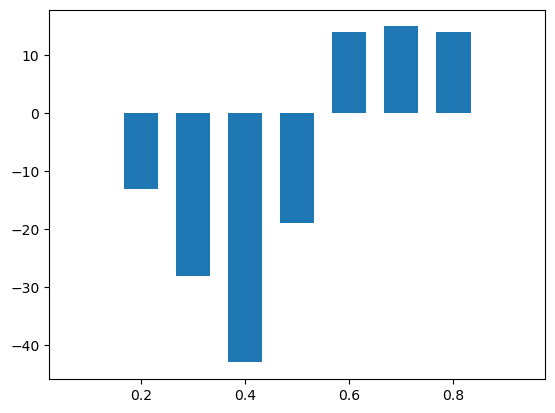

In [45]:
plt.bar(probs, nums_of_best_classes - nums_of_rand_classes, align='center', width = (probs[1]-probs[0])/3*2, alpha=1)

<BarContainer object of 9 artists>

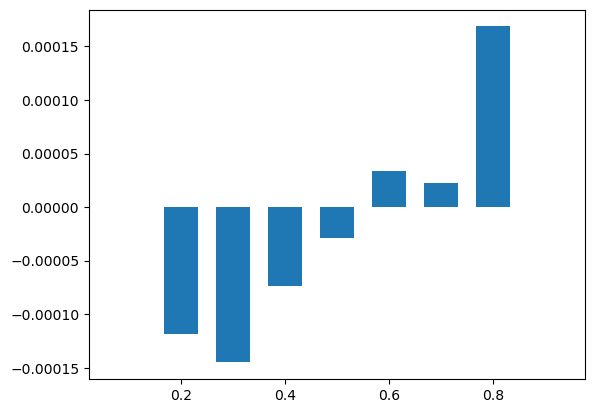

In [46]:
plt.bar(probs, best_dist_powers - rand_dist_powers, align='center', width = (probs[1]-probs[0])/3*2, alpha=1)

In [ ]:
plt.bar(probs, best_max_classes - best_max_classes.mean(), align='center', width = (probs[1]-probs[0])/3*2, alpha=1)

In [116]:
len(adj_matrices[7])

274668

In [141]:
#reversed vs decresasing ladder

probs = np.arange(0.0125, 1, 0.0125)
probs = np.flip(probs)
nums_of_rev_classes = []
nums_of_dec_classes = []
rev_dist_powers = []
dec_dist_powers = []
n = 5
num_of_Graphs = 5000
def big_work(p):
#for p in probs:
    #print('Статистика для p=' + str(p))
    j = n-2

    based = []
    for i in range(num_of_Graphs): 
        G = nx.gnp_random_graph(n,p)
        A = nx.to_numpy_array(G)
        based.append(A)
    #print('В датасете графы на ' + str(j+2) + ' вершинах в количестве '  + str(num_of_Graphs) + '(не обязательно разные)')


    summ = 0
    diagr = []
    for a in range(1, n):
        for b in range(1, a+1):
            if a == b:
                kmean = 0
                diagr.append(0)       
            else:
                kmean = 0
                for i in range(n):
                    kmean += comb(n-1, i)*p**(i)*(1-p)**(n-i-1)*i
                diagr.append(a*b*comb(n-1, a)*comb(n-1, b)*p**(a+b)*(1-p)**(2*n-a-b-2)*n/(kmean))
            summ += diagr[-1]
    for a in range(1, n):
        numb = 0
        for b in range(1, n):
            numb += diagr[int(max(a,b)*(max(a,b)-1)/2 + min(a,b))-1]
        diagr[int(a*(a-1)/2+a)-1] = ((a*comb(n-1,a)*p**a*(1-p)**(n-a-1)*n) - numb)/2
        summ += ((a*comb(n-1,a)*p**a*(1-p)**(n-a-1)*n) - numb)/2

    best_dic = {} 
    time = 0
    for tau in np.flip(np.argsort(diagr)):
        for a in range(1, n+1):
            for b in range(1, a+1):
                if int(a*(a-1)/2 + b) - 1 == tau:
                    best_dic[time] = [a,b]
        time += 1

    Polynomials = defaultdict(list)
    
    for i in based:
        polys, Graph = PPfromdict(i, best_dic)
        Polynomials[polys].append(Graph)

    negprob = 0
    for i in Polynomials:
        negprob += comb(len(Polynomials[i]), 2)
        
    classes_desc = len(Polynomials)
    power_desc = 1 - negprob/comb(num_of_Graphs, 2)

    #print('количество классов эквивалентности с убывающей ' + str(len(Polynomials)) )
    #print('вероятность различить два случайных графа из датасета с убывающей равна ' + str(1 - negprob/comb(num_of_Graphs, 2)))
    #nums_of_rev_classes.append(len(Polynomials))
    #rev_dist_powers.append(1 - negprob/comb(num_of_Graphs, 2))
    
    
#########################################################################################################################  
    
    
    summ = 0
    diagr = []
    for a in range(1, n):
        for b in range(1, a+1):
            if a == b:
                kmean = 0
                diagr.append(0)       
            else:
                kmean = 0
                for i in range(n):
                    kmean += comb(n-1, i)*p**(i)*(1-p)**(n-i-1)*i
                diagr.append(a*b*comb(n-1, a)*comb(n-1, b)*p**(a+b)*(1-p)**(2*n-a-b-2)*n/(kmean))
            summ += diagr[-1]
    for a in range(1, n):
        numb = 0
        for b in range(1, n):
            numb += diagr[int(max(a,b)*(max(a,b)-1)/2 + min(a,b))-1]
        diagr[int(a*(a-1)/2+a)-1] = ((a*comb(n-1,a)*p**a*(1-p)**(n-a-1)*n) - numb)/2
        summ += ((a*comb(n-1,a)*p**a*(1-p)**(n-a-1)*n) - numb)/2

    best_dic = {} 
    time = 0
    for tau in np.argsort(diagr):
        for a in range(1, n+1):
            for b in range(1, a+1):
                if int(a*(a-1)/2 + b) - 1 == tau:
                    best_dic[time] = [a,b]
        time += 1

    Polynomials = defaultdict(list)
    
    for i in based:
        polys, Graph = PPfromdict(i, best_dic)
        Polynomials[polys].append(Graph)

    negprob = 0
    for i in Polynomials:
        negprob += comb(len(Polynomials[i]), 2)

    classes_asc = len(Polynomials)
    power_asc = 1 - negprob/comb(num_of_Graphs, 2)
    
    #print('количество классов эквивалентности с возрастающей ' + str(len(Polynomials)) )
    #print('вероятность различить два случайных графа из датасета с возрастающей равна ' + str(1 - negprob/comb(num_of_Graphs, 2)))
    #nums_of_dec_classes.append(len(Polynomials))
    #dec_dist_powers.append(1 - negprob/comb(num_of_Graphs, 2))
    
    return classes_desc, power_desc, classes_asc, power_asc

for p, (classes_desc, power_desc, classes_asc, power_asc) in zip(probs, process_map(big_work, probs)):
    print('Статистика для p=' + str(p))
    print('В датасете графы на ' + str(n) + ' вершинах в количестве '  + str(num_of_Graphs) + '(не обязательно разные)')
    print('количество классов эквивалентности с убывающей ' + str(classes_desc) )
    print('вероятность различить два случайных графа из датасета с убывающей равна ' + str(power_desc))
    print('количество классов эквивалентности с возрастающей ' + str(classes_asc) )
    print('вероятность различить два случайных графа из датасета с возрастающей равна ' + str(power_asc))
    nums_of_dec_classes.append(classes_desc)
    dec_dist_powers.append(power_desc)
    nums_of_rev_classes.append(classes_asc)
    rev_dist_powers.append(power_asc)
    
    
    
    # Polynomials = defaultdict(list)
    # for i in adj_matrices[j]:
    #     polys, Graph = PPfromdict(i, best_dic)
    #     Polynomials[polys].append(Graph)
    # print('количество классов эквивалентности всего (у нашей нумерации) у графов на ' + str(j+2) + ' вершинах равна ' + str(len(Polynomials)) + ' (из ' + str(len(adj_matrices[j])) + ')') 
    # best_max_classes.append(len(Polynomials))

100%|█████████████████████████████████████████████████████████████████████████████████| 158/158 [26:08<00:00,  9.93s/it]

Статистика для p=0.9937500000000002
В датасете графы на 5 вершинах в количестве 5000(не обязательно разные)
количество классов эквивалентности с убывающей 4
вероятность различить два случайных графа из датасета с убывающей равна 0.11268037607521508
количество классов эквивалентности с возрастающей 4
вероятность различить два случайных графа из датасета с возрастающей равна 0.11268037607521508
Статистика для p=0.9875000000000003
В датасете графы на 5 вершинах в количестве 5000(не обязательно разные)
количество классов эквивалентности с убывающей 4
вероятность различить два случайных графа из датасета с убывающей равна 0.21047289457891583
количество классов эквивалентности с возрастающей 4
вероятность различить два случайных графа из датасета с возрастающей равна 0.21047289457891583
Статистика для p=0.9812500000000003
В датасете графы на 5 вершинах в количестве 5000(не обязательно разные)
количество классов эквивалентности с убывающей 5
вероятность различить два случайных графа из датасе

In [142]:
nums_of_rev_classes, nums_of_dec_classes, rev_dist_powers, dec_dist_powers = np.array(nums_of_rev_classes), np.array(nums_of_dec_classes), np.array(rev_dist_powers), np.array(dec_dist_powers)

In [156]:
probs = np.arange(0.0125, 1, 0.0125)
probs = np.flip(probs)

In [160]:
nums_of_dec_classes, nums_of_rev_classes, dec_dist_powers, rev_dist_powers = (np.array([    57,    162,    348,    672,   1209,   1994,   3107,   4642,
          6752,   9364,  12785,  16854,  21811,  27709,  34816,  42447,
         53201,  63117,  73934,  86567,  98623, 110991, 123792, 137816,
        152135, 164185, 174896, 187737, 196766, 205080, 211912, 221527,
        227274, 231129, 235136, 239416, 242262, 244377, 245847, 248181,
        249051, 248506, 247674, 247055, 245978, 244145, 241413, 237991,
        233109, 227763, 220451, 212289, 201996, 193136, 182665, 169295,
        153573, 139601, 124388, 110207,  93775,  80643,  67902,  55896,
         45249,  35862,  28264,  21701,  16344,  12078,   8527,   5953,
          3915,   2465,   1429,    789,    399,    165,     57]),
 np.array([    57,    162,    356,    699,   1296,   2170,   3423,   5197,
          7462,  10549,  14590,  19232,  25361,  32320,  39991,  48993,
         59195,  70453,  79542,  92625, 102638, 114993, 127377, 140861,
        154645, 168505, 177590, 183734, 194170, 201195, 210043, 216475,
        224022, 229769, 234413, 233835, 238358, 238058, 240351, 241005,
        242338, 243196, 245062, 241893, 239217, 232750, 229814, 225619,
        220267, 214851, 210307, 202288, 193261, 181683, 166772, 154298,
        139761, 126678, 114212, 100746,  86753,  74207,  62410,  51313,
         43291,  35705,  28082,  21284,  15867,  11607,   8110,   5901,
          3888,   2428,   1422,    783,    396,    165,     57]),
 np.array([0.61942608, 0.77790578, 0.85934982, 0.90850771, 0.94048147,
        0.9612561 , 0.97502636, 0.98400487, 0.98993592, 0.99354024,
        0.99589225, 0.99732457, 0.99827299, 0.99886493, 0.99925507,
        0.99950142, 0.99967626, 0.99978092, 0.99984699, 0.99990117,
        0.99992917, 0.99994798, 0.99996159, 0.99997108, 0.99997819,
        0.99998302, 0.99998618, 0.99998958, 0.99999129, 0.99999283,
        0.99999385, 0.99999488, 0.99999549, 0.99999595, 0.99999633,
        0.99999677, 0.99999701, 0.99999719, 0.99999728, 0.99999749,
        0.99999754, 0.99999753, 0.99999748, 0.99999741, 0.99999742,
        0.99999728, 0.99999705, 0.99999674, 0.99999643, 0.99999592,
        0.99999505, 0.99999409, 0.99999254, 0.99999137, 0.9999893 ,
        0.99998466, 0.99997856, 0.99997015, 0.99995701, 0.99993728,
        0.99990543, 0.99985639, 0.99977512, 0.99964785, 0.99943234,
        0.99908436, 0.99854055, 0.99762493, 0.99621169, 0.99391472,
        0.99007756, 0.98418436, 0.97515161, 0.96141609, 0.9404381 ,
        0.90883335, 0.8591642 , 0.77835362, 0.61901392]),
 np.array([0.61942608, 0.77790578, 0.85934983, 0.90850779, 0.94048211,
        0.96125904, 0.97503575, 0.98402203, 0.9899368 , 0.993578  ,
        0.9959554 , 0.9973938 , 0.99834459, 0.99893518, 0.99925487,
        0.99950461, 0.99967207, 0.99977912, 0.99984319, 0.99989449,
        0.99992368, 0.99994305, 0.99995856, 0.99996881, 0.99997674,
        0.9999827 , 0.99998629, 0.99998857, 0.9999907 , 0.99999181,
        0.99999312, 0.99999408, 0.99999501, 0.99999571, 0.9999963 ,
        0.99999644, 0.99999678, 0.99999662, 0.99999675, 0.99999687,
        0.99999701, 0.99999713, 0.99999727, 0.99999709, 0.99999691,
        0.99999623, 0.99999593, 0.99999543, 0.99999499, 0.9999943 ,
        0.99999351, 0.99999233, 0.99999078, 0.99998857, 0.99998476,
        0.99997964, 0.99997286, 0.99996236, 0.9999468 , 0.99992259,
        0.99988409, 0.99982768, 0.99973946, 0.99960594, 0.99939761,
        0.99904849, 0.99850298, 0.99758977, 0.99617982, 0.99389066,
        0.99006079, 0.98418459, 0.97515074, 0.96141573, 0.9404379 ,
        0.9088333 , 0.85916419, 0.77835362, 0.61901392]))

<BarContainer object of 79 artists>

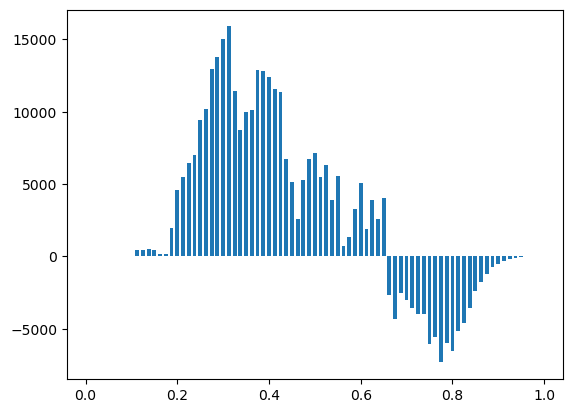

In [161]:
plt.bar(probs, nums_of_dec_classes - nums_of_rev_classes, align='center', width = -(probs[1]-probs[0])/3*2, alpha=1)

<BarContainer object of 79 artists>

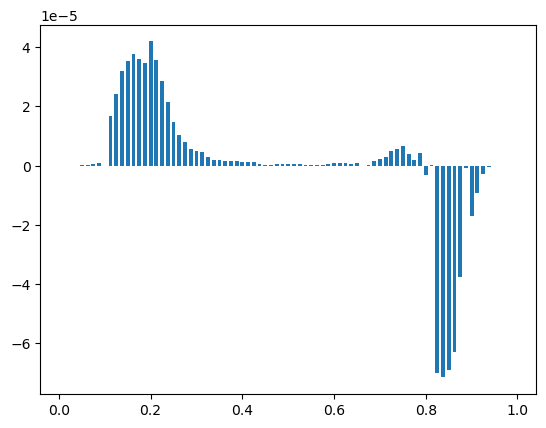

In [162]:
plt.bar(probs, dec_dist_powers- rev_dist_powers, align='center', width = -(probs[1]-probs[0])/3*2, alpha=1)

In [145]:
dec_dist_powers- rev_dist_powers

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])